# Schema

<img src="images/Northwind_ERD.png"/>

# AB Testing
**Netflix**
* Will use Algorithm A for customers {A} and B for customers in {B}
    * what metrics are being tracked
    * if you click on the movie
    * if you watch it
    * if you add it to your list
    * ratings
    * how much of it did you watch? 
* Duration: 30 days
* Run Analysis
* Make an Action Plan

**Facebook**
* Newsfeed Algorithms


**Instagram**
* Feed

**Amazon**
* Recommender Systems

# Objectives
* Answer questions using hypothesis testing
* Draw Action Plans/Recommendations

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
conn = sqlite3.Connection("Northwind_small.sqlite")

In [5]:
cur = conn.cursor()

In [8]:
# list all the tables of our database
r = cur.execute("select name from sqlite_master where type='table';").fetchall()
r

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

In [9]:
table_names = [t[0] for t in r]
table_names

['Employee',
 'Category',
 'Customer',
 'Shipper',
 'Supplier',
 'Order',
 'Product',
 'OrderDetail',
 'CustomerCustomerDemo',
 'CustomerDemographic',
 'Region',
 'Territory',
 'EmployeeTerritory']

In [11]:
# let's look at employee, customer and order tables
employee_df = pd.read_sql("select * from employee", conn)
employee_df.head(1)

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp


In [12]:
customer_df = pd.read_sql("select * from customer", conn)
customer_df.head(1)

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545


In [14]:
order_df = pd.read_sql("select * from [order]", conn)
order_df.head(1)

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France


# Question1: Does freight size by order vary by largerRegion

In [15]:
order_df.shape

(830, 14)

In [17]:
# unique countries
order_df['ShipRegion'].unique()

array(['Western Europe', 'South America', 'Central America',
       'North America', 'Northern Europe', 'Scandinavia',
       'Southern Europe', 'British Isles', 'Eastern Europe'], dtype=object)

In [18]:
# let's make a new column that is Europe or Americas
order_df['LargerRegion'] = order_df['ShipRegion'].apply(lambda x: 'Americas' if 'America' in x else 'Europe')
order_df.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,LargerRegion
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,Europe
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,Europe
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil,Americas
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France,Europe
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium,Europe


In [22]:
fs_americas = order_df.loc[order_df['LargerRegion']=='Americas', 'Freight']
fs_europe = order_df.loc[order_df['LargerRegion']=='Europe', 'Freight']
fs_americas.shape, fs_europe.shape

((325,), (505,))

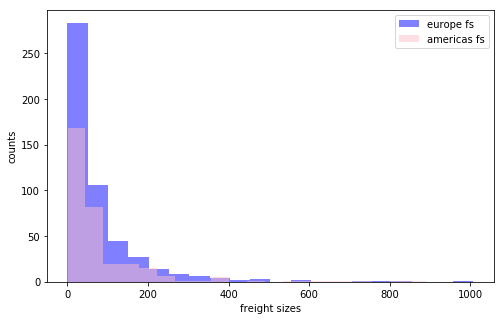

In [25]:
plt.figure(figsize=(8, 5))
plt.hist(fs_europe, color='blue', alpha=0.5, label='europe fs', bins=20)
plt.hist(fs_americas, color='pink', alpha=0.5, label='americas fs', bins=20)
plt.legend()
plt.xlabel("freight sizes")
plt.ylabel("counts")
plt.show()

# Step 1: 
- H0: u_am = u_eu
- HA: u_am != u_eu

# Step 2

In [26]:
fs_am_samps = [np.random.choice(fs_americas, size=325, replace=True).mean() for i in range(30)]
fs_eu_samps = [np.random.choice(fs_europe, size=505, replace=True).mean() for i in range(30)]

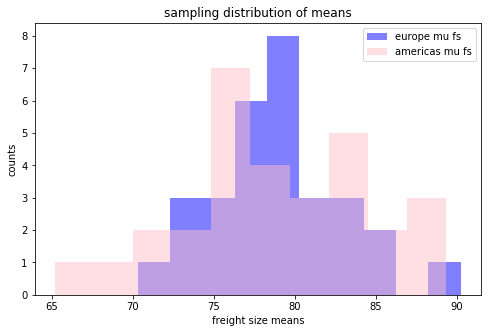

In [28]:
plt.figure(figsize=(8, 5))
plt.hist(fs_eu_samps, color='blue', alpha=0.5, label='europe mu fs', bins=10)
plt.hist(fs_am_samps, color='pink', alpha=0.5, label='americas mu fs', bins=10)
plt.legend()
plt.title("sampling distribution of means")
plt.xlabel("freight size means")
plt.ylabel("counts")
plt.show()

### Test for assumptions of the ttest
* is the data normal
* are the variances equal

In [30]:
# test normality
# H0: data is normal
# HA: data is not normal
fs_am_zscores = scs.zscore(fs_am_samps)
scs.kstest(fs_am_zscores, 'norm', args=(0, 1))

# p>0.05 fail to reject the null which means the data is normal

KstestResult(statistic=0.08497022780141406, pvalue=0.9819029896949801)

In [31]:
# test normality
# H0: data is normal
# HA: data is not normal
fs_eu_zscores = scs.zscore(fs_eu_samps)
scs.kstest(fs_eu_zscores, 'norm', args=(0, 1))

# p>0.05 fail to reject the null which means the data is normal

KstestResult(statistic=0.10210942611209872, pvalue=0.9131984576827601)

#### Data is normal! 

In [33]:
# H0: populations have equal variance
# HA: populations do not have equal variances

scs.bartlett(fs_am_zscores, fs_eu_zscores)
# P = 1.0 which means that the variances are equal

BartlettResult(statistic=0.0, pvalue=1.0)

# Now I can do a Ttest

In [35]:
# H0: fs_mean_am = fs_mean_eu
# HA: fs_mean_am != fs_mean_eu

scs.ttest_ind(fs_am_samps, fs_eu_samps, equal_var=False)

# means are equal

Ttest_indResult(statistic=-0.10639880565036594, pvalue=0.9156639999100907)

# Results
there are no differences between mean freight size between EU and AM.